In [11]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [ ]:
#define state
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float
    category:str


In [13]:
def claculate_bmi(state:BMIState)->BMIState:
    weight=state['weight_kg']
    height=state['height_m']
    bmi=weight/(height**2)
    state['bmi']=round(bmi,2)
    return state


In [39]:
def label_bmi(state:BMIState)->BMIState:
    bmi=state['bmi']
    if bmi ==0.01:
        state['category']="underweight"
    elif 18.5 <=bmi <25:
        state['category']="normal"
    else:
        state['category']='obese'
    return state



In [40]:
#define graph
graph=StateGraph(BMIState)

# add node to your graph
graph.add_node('claculate_bmi',claculate_bmi)
graph.add_node('label_bmi',label_bmi)
#add edge 
graph.add_edge(START,'claculate_bmi')
graph.add_edge('claculate_bmi','label_bmi')
graph.add_edge('label_bmi',END)

#compile the graph
workflow=graph.compile()



In [41]:
initial_state={'weight_kg':80,'height_m':123}

In [42]:
final_state=workflow.invoke(initial_state)

In [43]:
final_state

{'weight_kg': 80, 'height_m': 123, 'bmi': 0.01}

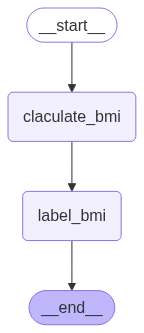

In [33]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())